In [ ]:
! mkdir ~/.kaggle/

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 423M/428M [00:05<00:00, 66.6MB/s]
100% 428M/428M [00:05<00:00, 86.7MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
      break
print('data set is loaded')

data set is loaded


In [ ]:
len(paths)

5621

In [ ]:
paths[:5]

['/content/toronto-emotional-speech-set-tess.zip',
 '/content/.config/.last_survey_prompt.yaml',
 '/content/.config/default_configs.db',
 '/content/.config/.last_opt_in_prompt.yaml',
 '/content/.config/active_config']

In [ ]:
labels[:5]

['toronto-emotional-speech-set-tess', 'prompt', 'configs', 'prompt', 'config']

In [ ]:
# create a data frame
columns = ['speech', 'label']
df = pd.DataFrame(columns = columns)
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/toronto-emotional-speech-set-tess.zip,toronto-emotional-speech-set-tess
1,/content/.config/.last_survey_prompt.yaml,prompt
2,/content/.config/default_configs.db,configs
3,/content/.config/.last_opt_in_prompt.yaml,prompt
4,/content/.config/active_config,config


In [ ]:
df['label'].value_counts()

In [ ]:
df['label_count'] = df['label'].value_counts()

In [ ]:
df.info()

In [ ]:
sns.countplot(data= df, x = 'label')
df
def waveplot(data, sr, emotion):
  plt.figure(figsize = (10,4))
  plt.title(emotion, size = 20)
  librosa.display.waveshow(data, sr = sr)
  plt.show()
def spectogram(data, sr, emotion):
  X = librosa.stft(data)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize = (11,4))
  plt.title(emotion, size = 20)
  librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
  plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       5621 non-null   object 
 1   label        5621 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 131.9+ KB


In [ ]:
df.drop('label_count',axis = 1, inplace = True)

In [ ]:
print(df.head())
print(df['label'].unique())

In [ ]:
from IPython.display import Audio

In [ ]:
df['speech'].unique()

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

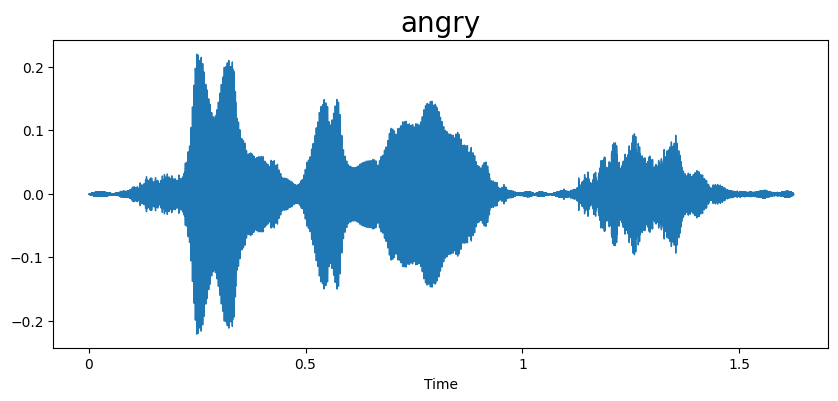

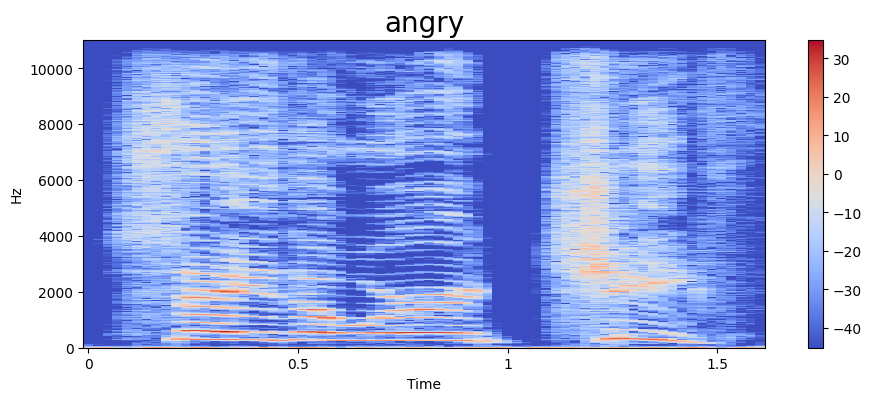

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
  y,sr = librosa.load(filename, duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mff(y = y, sr= sr, n_mfcc = 40).T, axis = 0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

In [ ]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
x_mfcc

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

## input split
X = np.expand_dims(X, -1)
X.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

y = y.toarray()

y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"


In [ ]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)


In [ ]:
# Plot the results
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))


#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
